Import Library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

Preprocessing Data

In [22]:
cardio_vascular_data = pd.read_csv('DATASET/cardio_train.csv', sep=';')
cardio_vascular_data.isnull().sum()
#Tidak terdapat missing value

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [4]:
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [23]:
cardio_vascular_data.drop(columns='id', axis=1)
cardio_vascular_data['age'] = cardio_vascular_data['age'] / 365

EDA

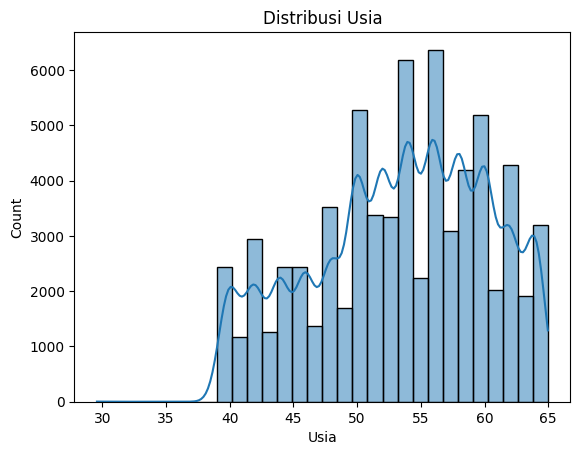

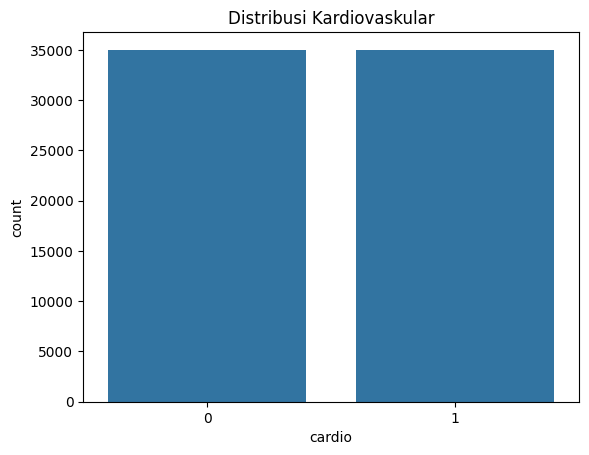

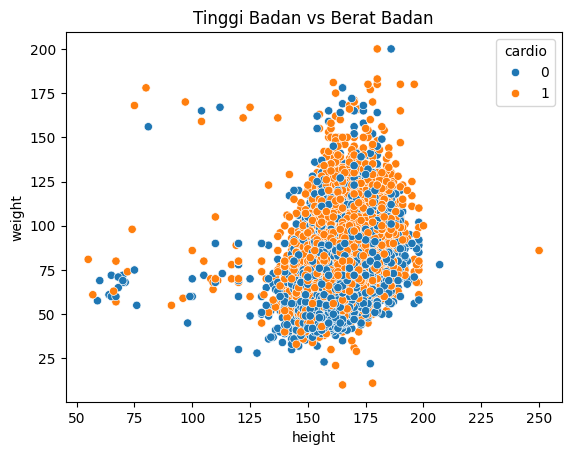

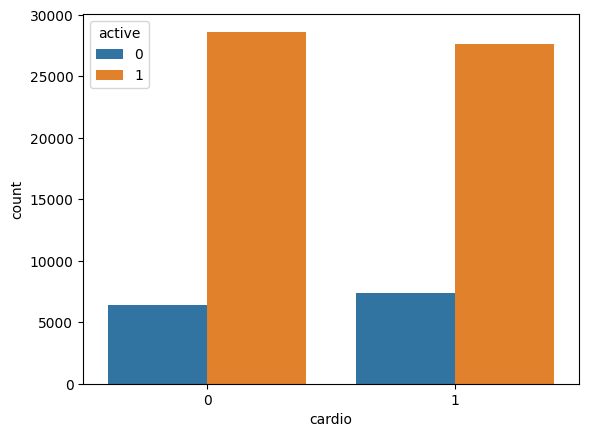

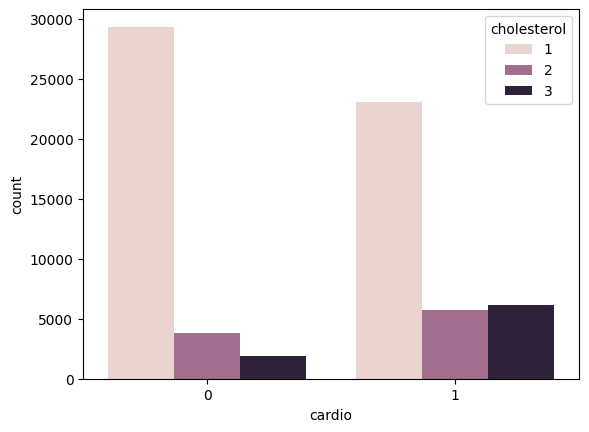

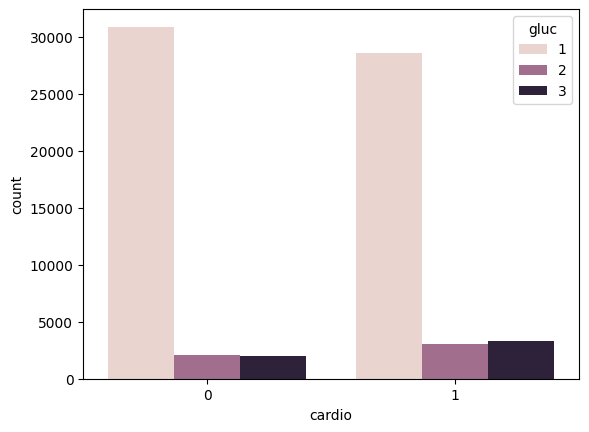

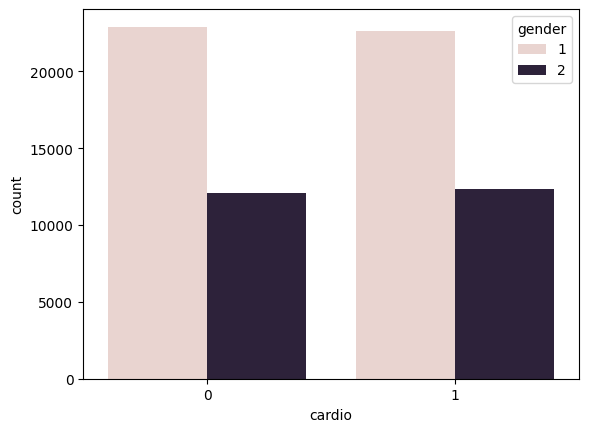

In [14]:
sns.histplot(cardio_vascular_data['age'], bins=30, kde=True)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.show()

sns.countplot(data=cardio_vascular_data, x = 'cardio')
plt.title('Distribusi Kardiovaskular')
plt.show()

sns.scatterplot(data=cardio_vascular_data, x='height', y='weight', hue='cardio')
plt.title('Tinggi Badan vs Berat Badan')
plt.show()

sns.countplot(data=cardio_vascular_data, x='cardio', hue='active')
plt.show()

sns.countplot(data=cardio_vascular_data, x='cardio', hue='cholesterol')
plt.show()

sns.countplot(data=cardio_vascular_data, x='cardio', hue='gluc')
plt.show()

sns.countplot(data=cardio_vascular_data, x='cardio', hue='gender')
plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Models

Logistic Regresi without scaling

In [ ]:
X = cardio_vascular_data.drop(columns='cardio')
y = cardio_vascular_data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)
conf_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix:\n', conf_matrix)

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71      6988
           1       0.71      0.67      0.69      7012

    accuracy                           0.70     14000
   macro avg       0.70      0.70      0.70     14000
weighted avg       0.70      0.70      0.70     14000

confusion_matrix:
 [[5111 1877]
 [2334 4678]]


Logistic Regresi with scaling

In [18]:
X = cardio_vascular_data.drop(columns='cardio')
y = cardio_vascular_data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model_2 = LogisticRegression()
model_2.fit(X_train_scaled, y_train)
y_pred_2 = model_2.predict(X_test_scaled)

In [19]:
print(f'Accuracy after scaling: {accuracy_score(y_test, y_pred_2):.2f}')
print('Classification Report after scaling:\n', classification_report(y_test, y_pred_2))
print('confusion_matrix after scaling:\n', confusion_matrix(y_test, y_pred_2))

Accuracy after scaling: 0.72
Classification Report after scaling:
               precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000

confusion_matrix after scaling:
 [[5360 1628]
 [2245 4767]]


RandomForest Classifier Models

Without Hyperparamater Tuning

In [24]:
X = cardio_vascular_data.drop(columns='cardio')
y = cardio_vascular_data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [21]:
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}')
print('Random Forest Classification Report:\n', classification_report(y_test, y_pred_rf))
print('Random Forest confusion_matrix:\n', confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.73
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.75      0.73      6988
           1       0.74      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000

Random Forest confusion_matrix:
 [[5257 1731]
 [2090 4922]]


With Hyperparameter Tuning

In [ ]:
params_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(model, params_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
best_models = grid.search.best_estimator_
y_pred_best = best_models.predict(X_test)
print(f'Best Random Forest Accuracy: {accuracy_score(y_test, y_pred_best):.2f}')
print('Best Random Forest Classification Report:\n', classification_report(y_test, y_pred_best))
print('Best Random Forest confusion_matrix:\n', confusion_matrix(y_test, y_pred_best))